<h1>DRV Analysis</h1>

In [1]:
from properties import rit_models, l_ax, w_ax_step_param, save_w_ax, l_pmos_q, w_pmos_q, l_nmos_q, w_nmos_q, l_pmos_q_neg, w_pmos_q_neg, l_nmos_q_neg, w_nmos_q_neg, vdd, vsweep, dc_vsweep
from utils.path import ltspice, schematics, images, snm_standard_data
from utils.check import check_output_image
from utils.patterns import w_ax_snm_standard_pattern
from utils.conv import str2float
import re
from models.ops import load
from PyLTSpice import SimRunner
import matplotlib.pyplot as plt
import os

<h2>SNM Standard Analysis</h2>

<h3>Hold Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/snm-standard/snm_standard.raw
File opened successfully: ../../ltspice/models/snm-standard/snm_standard.asc


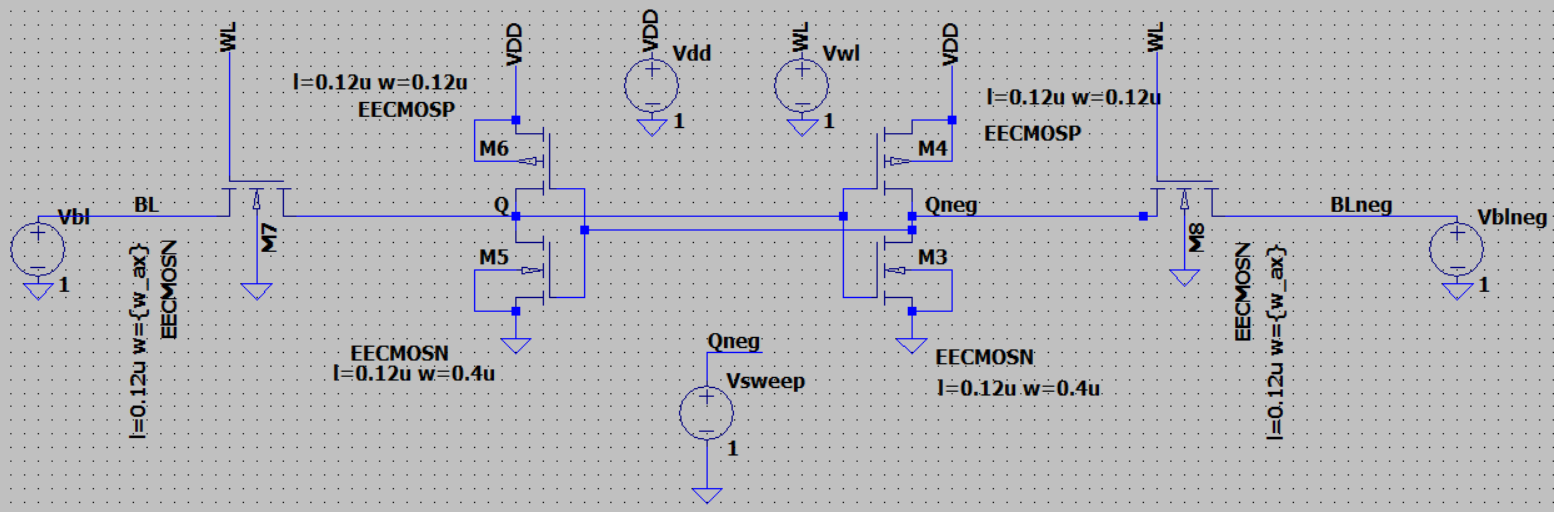

Successful/Total Simulations: 0/1
Raw file: data\snm-standard\hold\snm_standard_1.raw, Log file: data\snm-standard\hold\snm_standard_1.log
File updated successfully: ../../images/snm_standard_hold_simulation.png


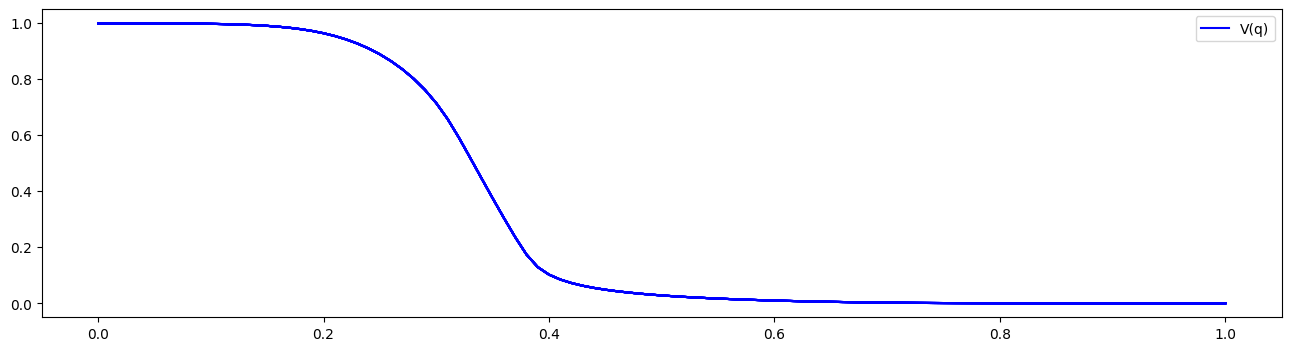

In [2]:
snm_standard_hold_ltr, snm_standard_hold_netlist = load(
                                                raw_file_path=os.path.join(ltspice, "snm-standard/snm_standard.raw"),
                                                asc_file_path=os.path.join(ltspice, "snm-standard/snm_standard.asc"),
                                                schematic_image_path=os.path.join(schematics, "snm_standard.png")
                                            )
vwl = 0; vbl = 1; vblneg = 1
snm_standard_hold_netlist.set_parameter('l_ax', l_ax)
#snm_standard_hold_netlist.set_parameter('w_ax', w_ax)
snm_standard_hold_netlist.set_parameter('l_pmos_q', l_pmos_q)
snm_standard_hold_netlist.set_parameter('w_pmos_q', w_pmos_q)
snm_standard_hold_netlist.set_parameter('l_nmos_q', l_nmos_q)
snm_standard_hold_netlist.set_parameter('w_nmos_q', w_nmos_q)
snm_standard_hold_netlist.set_parameter('l_pmos_q_neg', l_pmos_q_neg)
snm_standard_hold_netlist.set_parameter('w_pmos_q_neg', w_pmos_q_neg)
snm_standard_hold_netlist.set_parameter('l_nmos_q_neg', l_nmos_q_neg)
snm_standard_hold_netlist.set_parameter('w_nmos_q_neg', w_nmos_q_neg)
snm_standard_hold_netlist.set_parameter('vdd', vdd)
snm_standard_hold_netlist.set_parameter('vwl', vwl)
snm_standard_hold_netlist.set_parameter('vbl', vbl)
snm_standard_hold_netlist.set_parameter('vblneg', vblneg)
snm_standard_hold_netlist.set_parameter('vsweep', vsweep)
snm_standard_hold_netlist.add_instructions(
                                        rit_models,
                                        dc_vsweep,
                                        w_ax_step_param,
                                        save_w_ax
                                    )
snm_standard_hold_runner = SimRunner(output_folder=f"{snm_standard_data}/hold/")
snm_standard_hold_runner.run(netlist=snm_standard_hold_netlist)
print('Successful/Total Simulations: ' + str(snm_standard_hold_runner.okSim) + '/' + str(snm_standard_hold_runner.runno))

snm_standard_hold_log = ""
for snm_standard_hold_raw, snm_standard_hold_log in snm_standard_hold_runner:
    print("Raw file: %s, Log file: %s" % (snm_standard_hold_raw, snm_standard_hold_log))

v_q_snm_standard_hold = snm_standard_hold_ltr.get_trace("V(q)")
vsweep_snm_standard_hold = snm_standard_hold_ltr.get_trace('vsweep')
steps = snm_standard_hold_ltr.get_steps()

plt.figure(figsize=(16, 4))
for step in range(len(steps)):
    plt.plot(vsweep_snm_standard_hold.get_wave(step), v_q_snm_standard_hold.get_wave(step), label=steps[step], color='blue')
plt.legend(["V(q)"])
snm_standard_hold_simulation_path_image = os.path.join(images, "snm_standard_hold_simulation.png")
check_output_image(snm_standard_hold_simulation_path_image)
plt.savefig(snm_standard_hold_simulation_path_image)
plt.show()

w_ax_snm_standard_hold = [1.2e-07, 1.3e-07, 1.4e-07, 1.5e-07, 1.6e-07, 1.7e-07, 1.8e-07, 1.9e-07, 2e-07, 2.1e-07, 2.2e-07, 2.3e-07, 2.4e-07]
File not found: ../../images/w_ax_snm_standard_hold.png
File created successfully: ../../images/w_ax_snm_standard_hold.png


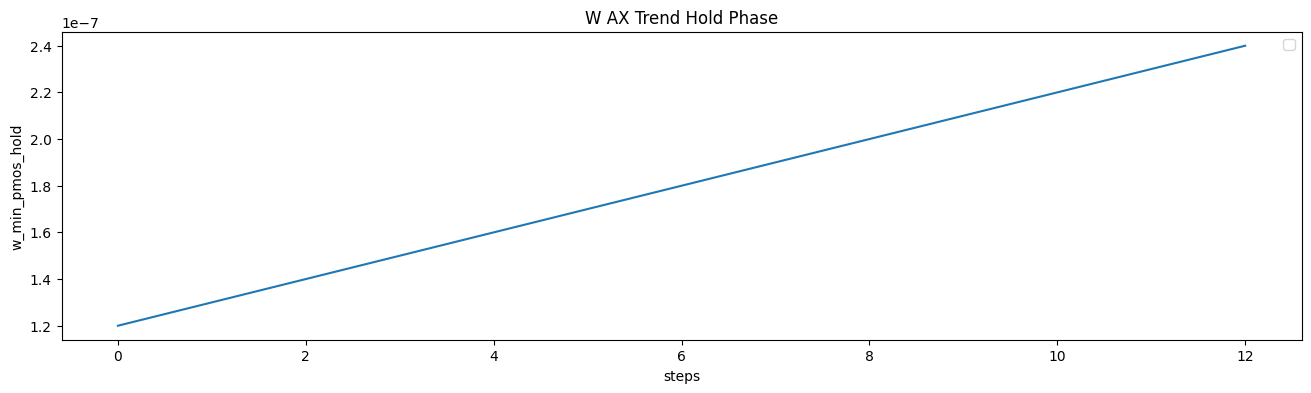

In [3]:
snm_standard_hold_log_file_path = f"./{snm_standard_hold_log}"

with open(snm_standard_hold_log_file_path, "r") as file:
    content = file.read()


w_ax_snm_standard_hold_data = re.search(w_ax_snm_standard_pattern, content, re.DOTALL).group(1)
w_ax_snm_standard_hold_lines = w_ax_snm_standard_hold_data.strip().split('\n')[1:]
w_ax_snm_standard_hold = [float(line.split('\t')[1]) for line in w_ax_snm_standard_hold_lines]

print(f'w_ax_snm_standard_hold = {w_ax_snm_standard_hold}')
plt.figure(figsize=(16, 4))
plt.legend(['w_ax_snm_standard_hold'])
plt.plot(w_ax_snm_standard_hold, label='w_ax_snm_standard_hold')
plt.ylabel('w_min_pmos_hold'); plt.xlabel('steps'); plt.title('W AX Trend Hold Phase')
w_ax_snm_standard_hold_path_image = os.path.join(images, "w_ax_snm_standard_hold.png")
check_output_image(w_ax_snm_standard_hold_path_image)
plt.savefig(w_ax_snm_standard_hold_path_image)
plt.show()

File not found: ../../images/butterfly_curve_snm_standard_hold.png
File created successfully: ../../images/butterfly_curve_snm_standard_hold.png


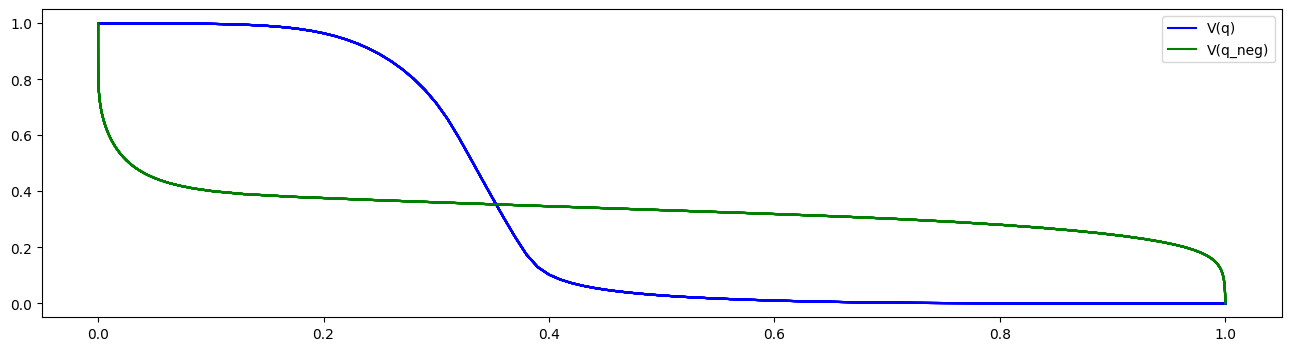

In [4]:
plt.figure(figsize=(16, 4))
for step in range(len(steps)):
    plt.plot(vsweep_snm_standard_hold.get_wave(step), v_q_snm_standard_hold.get_wave(step), label=steps[step], color='blue')
    plt.plot(v_q_snm_standard_hold.get_wave(step), vsweep_snm_standard_hold.get_wave(step), label=steps[step], color='green')
plt.legend(["V(q)", "V(q_neg)"])
butterfly_curve_snm_standard_hold_path_image = os.path.join(images, "butterfly_curve_snm_standard_hold.png")
check_output_image(butterfly_curve_snm_standard_hold_path_image)
plt.savefig(butterfly_curve_snm_standard_hold_path_image)
plt.show()

<h3>Read Phase SRAM 6T</h3>

<h3>Alpha Ratio and Beta Ratio</h3>

In [5]:
w_pu = str2float(w_pmos_q)
w_pd = str2float(w_nmos_q)

alpha_ratio = [w_pu / w_ax for w_ax in w_ax_snm_standard_hold]
print(f'alpha_ratio={alpha_ratio}')
beta_ratio = [w_pd / w_ax for w_ax in w_ax_snm_standard_hold]
print(f'beta_ratio={beta_ratio}')

alpha_ratio=[1000000.0, 923076.923076923, 857142.857142857, 800000.0, 750000.0, 705882.3529411765, 666666.6666666666, 631578.947368421, 600000.0, 571428.5714285714, 545454.5454545454, 521739.1304347826, 500000.0]
beta_ratio=[4000000.0, 3692307.692307692, 3428571.428571428, 3200000.0, 3000000.0, 2823529.411764706, 2666666.6666666665, 2526315.789473684, 2400000.0, 2285714.2857142854, 2181818.1818181816, 2086956.5217391304, 2000000.0]
